In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from Bio.Seq import Seq
from transformers import TFBertModel, BertTokenizer,BertConfig
import re
import pickle
import sys
import gc
import os
import shutil
import glob
from imblearn.over_sampling import SMOTE, SMOTENC, BorderlineSMOTE
import math
import random

# np.random.seed(42)
# tf.random.set_seed(42)
# os.environ['PYTHONHASHSEED']=str(42)
tf.keras.utils.set_random_seed(42)

In [2]:
# import the embeddings from each folder in full. Train test split each dataset with random seed 42 (I hope it will work) and keep only the X_test. 

# Loading Diseases

In [3]:
hiv_average_embeddings = [[None] * 1024]

In [4]:
number_param_hiv = 5
for i in range(number_param_hiv):
    with open("hiv_binary_embeddings/hiv_" + str(i) + ".pkl", "rb") as f:
        hiv_temp = pickle.load(f)
        hiv_average_embeddings = np.concatenate((hiv_average_embeddings, hiv_temp))
    f.close()

hiv_average_embeddings = np.delete(hiv_average_embeddings, 0, 0)

In [5]:
covid_average_embeddings = [[None] * 1024]

In [6]:
number_param_covid = 5
for i in range(1, number_param_covid):
    with open("../bert/prot_bert_bfd_embeddings_v2/covid_" + str(i) + ".pkl", "rb") as f:
        covid_temp = pickle.load(f)[1]
        covid_average_embeddings = np.concatenate((covid_average_embeddings, covid_temp))
    f.close()

covid_average_embeddings = np.delete(covid_average_embeddings, 0, 0)

In [7]:
influenza_average_embeddings = [[None] * 1024]

In [8]:
number_param_influenza = 1
for i in range(number_param_influenza):
    with open("influenza_binary_embeddings/influenza_" + str(i) + ".pkl", "rb") as f:
        influenza_temp = pickle.load(f)
        influenza_average_embeddings = np.concatenate((influenza_average_embeddings, influenza_temp))
    f.close()

influenza_average_embeddings = np.delete(influenza_average_embeddings, 0, 0)

In [9]:
dengue_average_embeddings = [[None] * 1024]

In [10]:
number_param_dengue = 1
for i in range(number_param_dengue):
    with open("dengue_binary_embeddings/dengue_" + str(i) + ".pkl", "rb") as f:
        dengue_temp = pickle.load(f)
        dengue_average_embeddings = np.concatenate((dengue_average_embeddings, dengue_temp))
    f.close()

dengue_average_embeddings = np.delete(dengue_average_embeddings, 0, 0)

In [11]:
cll_average_embeddings = [[None] * 1024]

In [12]:
number_param_cll = 1
for i in range(number_param_cll):
    with open("cll_binary_embeddings/cll_" + str(i) + ".pkl", "rb") as f:
        cll_temp = pickle.load(f)
        cll_average_embeddings = np.concatenate((cll_average_embeddings, cll_temp))
    f.close()

cll_average_embeddings = np.delete(cll_average_embeddings, 0, 0)

# Loading Healthy

In [13]:
healthy_average_embeddings = [[None] * 1024]

In [14]:
number_param_healthy = 14
for i in range(number_param_healthy):
    with open("hiv_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
        healthy_temp = pickle.load(f)
        healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
    f.close()

healthy_average_embeddings = np.delete(healthy_average_embeddings, 0, 0)

In [15]:
# number_param_healthy = 13
# for i in range(number_param_healthy):
#     with open("multi_class_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_multi_class = np.delete(healthy_average_embeddings, 0, 0)

In [16]:
# number_param_healthy = 2
# for i in range(number_param_healthy):
#     with open("influenza_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_influenza = np.delete(healthy_average_embeddings, 0, 0)

In [17]:
# number_param_healthy = 1
# for i in range(number_param_healthy):
#     with open("dengue_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_dengue = np.delete(healthy_average_embeddings, 0, 0)

In [18]:
# number_param_healthy = 1
# for i in range(number_param_healthy):
#     with open("cll_binary_embeddings/healthy_" + str(i) + ".pkl", "rb") as f:
#         healthy_temp = pickle.load(f)
#         healthy_average_embeddings = np.concatenate((healthy_average_embeddings, healthy_temp))
#     f.close()

# healthy_average_embeddings_cll = np.delete(healthy_average_embeddings, 0, 0)

In [19]:
print(healthy_average_embeddings.shape)

(41000, 1024)


# Train Test Splits

In [20]:
X = np.concatenate((hiv_average_embeddings[:3000], covid_average_embeddings[:3000], influenza_average_embeddings, dengue_average_embeddings, cll_average_embeddings, healthy_average_embeddings[:3000]))
y = np.concatenate(([1] * 3000, [2] * 3000, [3] * len(influenza_average_embeddings), [4] * len(dengue_average_embeddings), [5] * len(cll_average_embeddings), [0] * 3000))
X = np.asarray(X).astype('float32')
print(X.shape)
print(y.shape)
# print(X_test.shape)
# print(y_test.shape)

(10710, 1024)
(10710,)


In [21]:
sm = BorderlineSMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print(X.shape)
print(len([i for i in y if i == 0]))
print(len([i for i in y if i == 1]))
print(len([i for i in y if i == 2]))

(18000, 1024)
3000
3000
3000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [23]:
del X
del y
gc.collect()

0

In [24]:
print(X_train[0])

[-0.02946383 -0.0040256  -0.00559456 ...  0.00752819 -0.02341161
 -0.02630968]


In [25]:
print(y_train[0])

4


In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(1024),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(784, activation='relu'),
  tf.keras.layers.Dropout(0.3, seed=42),
  tf.keras.layers.Dense(512, activation='relu'),
  # tf.keras.layers.Dense(384, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5, seed=42),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  # tf.keras.layers.Dense(8, activation='relu'),
  # tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(6, activation='softmax')
])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(1024,)),
#   tf.keras.layers.Dense(1024, activation='relu'),
#   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dropout(0.5, seed=42),
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5, seed=42),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(16, activation='relu'),
#   # tf.keras.layers.Dense(8, activation='relu'),
#   # tf.keras.layers.Dense(4, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-01-29 21:21:05.627425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-29 21:21:05.627590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 784)               803600    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               3

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [28]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=150,
    mode='auto',
    restore_best_weights=True,
)

In [29]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="multi_class_weights/",
                                                 save_weights_only=True,
                                                 verbose=1)

In [30]:
history = model.fit(X_train, y_train, epochs=1000, validation_data = (X_val, y_val), callbacks=[es])

Epoch 1/1000


2023-01-29 21:21:06.124986: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-29 21:21:06.427332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


456/456 [==============================] - ETA: 0s - loss: 1.1080 - accuracy: 0.5102

2023-01-29 21:21:11.688256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


456/456 [==============================] - 6s 11ms/step - loss: 1.1080 - accuracy: 0.5102 - val_loss: 0.7579 - val_accuracy: 0.6883
Epoch 2/1000
456/456 [==============================] - 5s 10ms/step - loss: 0.7110 - accuracy: 0.6959 - val_loss: 0.6635 - val_accuracy: 0.7315
Epoch 3/1000
456/456 [==============================] - 5s 11ms/step - loss: 0.6113 - accuracy: 0.7466 - val_loss: 0.5751 - val_accuracy: 0.7772
Epoch 4/1000
456/456 [==============================] - 5s 10ms/step - loss: 0.5612 - accuracy: 0.7750 - val_loss: 0.5526 - val_accuracy: 0.7685
Epoch 5/1000
456/456 [==============================] - 5s 10ms/step - loss: 0.5354 - accuracy: 0.7840 - val_loss: 0.5173 - val_accuracy: 0.7932
Epoch 6/1000
456/456 [==============================] - 5s 10ms/step - loss: 0.4990 - accuracy: 0.8003 - val_loss: 0.4925 - val_accuracy: 0.7994
Epoch 7/1000
456/456 [==============================] - 5s 11ms/step - loss: 0.4792 - accuracy: 0.8065 - val_loss: 0.4881 - val_accuracy: 0.821

In [31]:
with open('multi_class_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

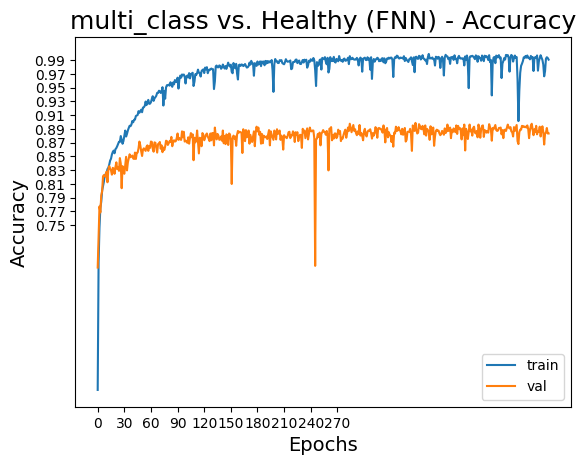

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('multi_class vs. Healthy (FNN) - Accuracy', fontsize=18)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.yticks(np.arange(0.75, 1.0, 0.02))
plt.xticks(np.arange(0, 280, 30.0))
plt.legend(['train', 'val'], loc='lower right')
plt.show()

## Model 3 Testing

In [33]:
model.save("multi_class_model.h5")

In [ ]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 6ms/step - loss: 0.8312 - accuracy: 0.9000


[0.8311726450920105, 0.9000000357627869]

In [26]:
model = tf.keras.models.load_model("multi_class_model.h5")

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-02-09 22:12:16.728101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-09 22:12:16.728235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [43]:
y_pred = []
y_true = y_test

for i in X_test:
    i = np.expand_dims(i, axis=0)
    if np.amax(model.predict(i)) != 1:
        print(model.predict(i))

y_pred

1/1 [==============================] - 0s 14ms/step
[[9.9307740e-01 6.5395902e-03 1.3719416e-04 2.2635158e-04 0.0000000e+00
  1.9448877e-05]]
1/1 [==============================] - 0s 14ms/step
[[2.1128753e-01 7.6862961e-01 3.0953975e-03 1.6987506e-02 5.8804311e-19
  2.0161940e-08]]
1/1 [==============================] - 0s 14ms/step
[[1.2736527e-09 5.6823148e-07 1.0225307e-08 9.9999940e-01 2.9805773e-37
  1.1703145e-15]]
1/1 [==============================] - 0s 15ms/step
[[4.4884000e-04 1.3481141e-02 9.6287712e-04 9.8509640e-01 3.0529904e-12
  1.0684284e-05]]
1/1 [==============================] - 0s 15ms/step
[[3.5604525e-01 3.9415330e-02 6.3321064e-03 5.9681410e-01 2.2768077e-17
  1.3932806e-03]]
1/1 [==============================] - 0s 15ms/step
[[1.1644584e-05 9.9896348e-01 1.8046707e-07 1.0247453e-03 4.5867578e-31
  1.1816004e-22]]
1/1 [==============================] - 0s 13ms/step
[[6.9792666e-03 1.8220348e-02 1.9502220e-03 9.7279197e-01 5.8898093e-15
  5.8145684e-05]]
1/1 [=

[]

: 

In [ ]:
y_pred = []
y_true = y_test

for i in X_test:
    i = np.expand_dims(i, axis=0)
    y_pred.append(np.argmax(model.predict(i)))

y_pred

1/1 [==============================] - 0s 16ms/step


2023-02-09 22:12:31.070881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


[1,
 3,
 0,
 2,
 1,
 3,
 1,
 3,
 3,
 3,
 5,
 5,
 3,
 3,
 1,
 1,
 3,
 2,
 2,
 0,
 4,
 1,
 0,
 2,
 1,
 0,
 4,
 5,
 4,
 4,
 3,
 0,
 5,
 1,
 5,
 1,
 2,
 4,
 3,
 3,
 2,
 2,
 0,
 2,
 0,
 4,
 2,
 1,
 0,
 3,
 2,
 1,
 4,
 5,
 5,
 4,
 1,
 0,
 5,
 4,
 2,
 4,
 0,
 4,
 1,
 5,
 4,
 0,
 3,
 2,
 2,
 0,
 3,
 2,
 0,
 2,
 1,
 2,
 1,
 5,
 4,
 1,
 4,
 1,
 1,
 2,
 4,
 0,
 2,
 0,
 0,
 2,
 3,
 3,
 5,
 5,
 3,
 5,
 0,
 1,
 0,
 2,
 5,
 1,
 5,
 4,
 1,
 5,
 1,
 0,
 5,
 0,
 4,
 3,
 0,
 5,
 0,
 5,
 4,
 2,
 5,
 5,
 3,
 4,
 4,
 1,
 2,
 5,
 4,
 4,
 4,
 0,
 1,
 5,
 5,
 3,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 3,
 5,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 4,
 2,
 4,
 0,
 4,
 2,
 4,
 2,
 4,
 5,
 4,
 1,
 2,
 4,
 5,
 3,
 4,
 2,
 0,
 2,
 3,
 1,
 0,
 1,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 3,
 0,
 4,
 4,
 4,
 0,
 5,
 0,
 0,
 3,
 5,
 5,
 0,
 3,
 5,
 5,
 1,
 4,
 3,
 0,
 2,
 4,
 5,
 1,
 3,
 3,
 4,
 1,
 1,
 4,
 4,
 5,
 0,
 4,
 4,
 4,
 1,
 5,
 5,
 4,
 2,
 0,
 5,
 1,
 3,
 4,
 2,
 3,
 5,
 0,
 3,
 4,
 4,
 3,
 3,
 3,
 1,
 2,
 1,
 2,
 0,


In [41]:
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8493    0.8052    0.8267       308
           1     0.7764    0.8438    0.8087       288
           2     0.9128    0.9189    0.9158       296
           3     0.9067    0.8746    0.8903       311
           4     1.0000    1.0000    1.0000       290
           5     0.9902    0.9902    0.9902       307

    accuracy                         0.9050      1800
   macro avg     0.9059    0.9054    0.9053      1800
weighted avg     0.9063    0.9050    0.9053      1800



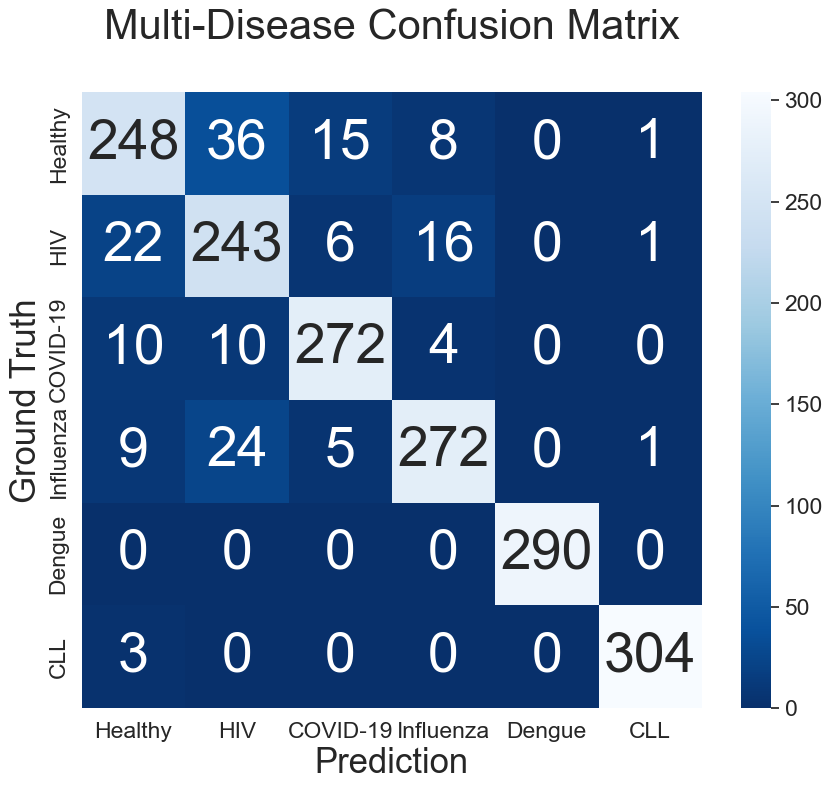

tf.Tensor(
[[248  36  15   8   0   1]
 [ 22 243   6  16   0   1]
 [ 10  10 272   4   0   0]
 [  9  24   5 272   0   1]
 [  0   0   0   0 290   0]
 [  3   0   0   0   0 304]], shape=(6, 6), dtype=int32)


In [38]:
correct_labels = np.array(tf.concat([item for item in y_true], axis = 0))
predicted_labels = np.array(tf.concat([item for item in y_pred], axis = 0))

confusion_mtx = tf.math.confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.title('Multi-Disease Confusion Matrix\n', fontsize=30)
sns.set(font_scale=1.5)

cmap = sns.color_palette("Blues_r", as_cmap=True)

sns.heatmap(confusion_mtx,
            xticklabels=["Healthy", "HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            yticklabels=["Healthy", "HIV", "COVID-19", "Influenza", "Dengue", "CLL"],
            annot=True, fmt='g', annot_kws={"size":40}, cmap=cmap)
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Ground Truth', fontsize=25)
plt.show()

print(confusion_mtx)

In [41]:
tf.math.confusion_matrix([0, 0, 0, 0, 0], [1, 1, 1, 1, 1]) # represents # of false positives (0 actual 1 pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 5],
       [0, 0]], dtype=int32)>